# SMT Python Seminar - Model fitting

* `numpy.polyfit`
* Least-squares solution to $\mathbf{Ax} = \mathbf{b}$: `numpy.linalg.lstsq`

## Enabling some magic

More on the Jupyter magic commands: https://alexsm.com/jupyter-notebook-ipython-magic/

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Imports

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

## Least-squares polynomial fit

https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

Basic linear model:

$y = ax + b$

$y_{measured} = ax + b + \epsilon$, where $\epsilon \sim N(0, \sigma)$

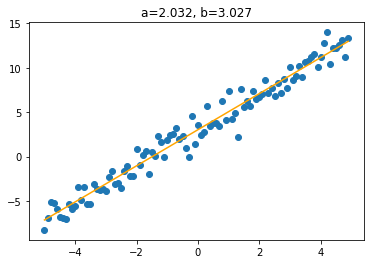

In [4]:
def demo_model_fit(a=2., b=3., normal_std=1.):
    
    x = np.arange(-5, 5, 0.1)
    y_true = a * x + b 
    y_noisy = y_true + np.random.normal(scale=normal_std, size=len(x))
    
    coefs = np.polyfit(x, y_noisy, deg=1)
    fitted_polynimial = np.poly1d(coefs)
    
    plt.scatter(x, y_noisy)
    plt.plot(x, fitted_polynimial(x), color='orange')
    plt.title('a={:.3f}, b={:.3f}'.format(coefs[0], coefs[1]))

    
demo_model_fit(normal_std=1.)

## Direct utilization of `np.linalg.lstsq`

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html

Order of powers:
0
1
2
A=
[[ 1.   -5.   25.  ]
 [ 1.   -4.5  20.25]
 [ 1.   -4.   16.  ]
 [ 1.   -3.5  12.25]
 [ 1.   -3.    9.  ]
 [ 1.   -2.5   6.25]
 [ 1.   -2.    4.  ]
 [ 1.   -1.5   2.25]
 [ 1.   -1.    1.  ]
 [ 1.   -0.5   0.25]
 [ 1.    0.    0.  ]
 [ 1.    0.5   0.25]
 [ 1.    1.    1.  ]
 [ 1.    1.5   2.25]
 [ 1.    2.    4.  ]
 [ 1.    2.5   6.25]
 [ 1.    3.    9.  ]
 [ 1.    3.5  12.25]
 [ 1.    4.   16.  ]
 [ 1.    4.5  20.25]]
Estimated coefficients:
[4.45397474 4.41601492 2.07152228]


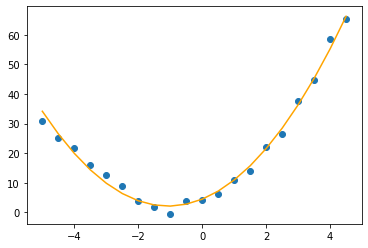

In [5]:
def demo_lstsq(true_coefs, normal_std=1.):
    
    x = np.arange(-5, 5, 0.5)
    
    print('Order of powers:')
    
    y_true = np.zeros_like(x)
    for i, c in enumerate(true_coefs):
        y_true += c*(x**i)
        print(i)
    
    y_noisy = y_true + np.random.normal(scale=normal_std, size=len(x))
        
    A_size = (len(x), len(true_coefs))
    A = np.ones(A_size)
    for j in range(1, len(true_coefs)):
        A[:, j] = x**j
    
    print('A=')
    print(A)
    
    estimated_coefs, _, _, _ = np.linalg.lstsq(A, y_noisy, rcond=None)
    print('Estimated coefficients:')
    print(estimated_coefs)
    
    fitted_model = np.poly1d(list(reversed(estimated_coefs)))
    
    plt.scatter(x, y_noisy)
    plt.plot(x, fitted_model(x), color='orange')
    

demo_lstsq([5, 4, 2], normal_std=2.)